# Explored How The Geographical Location Affects The Aestheitc Style And Removal of A Graffito 

## Focus questions

In this section, I will:

- Combine previous miletones (3).
- Formulate two questions that have not been addressed previously in the milestones.  
    - Does our block group have more or less colorful graffiti (looking at `colors` column of the graffito dataset)?
    - How does `property_type` and `canvas_nature` combinations contribute to the amount of graffiti removals?
- Interpret my results: What I learn from the investigations? Are there any caveats surrounding the study?

## Basic information:  
 - Annie Zhang, Eowyn Gordon
 - 530330061002
 - Dec 10, Autumn 2021
 - wk10_data
     - canvas_wk10.csv
     - graffito_wk10.csv

## Pre-processing:  

### Install

In [1]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install rtree

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


### Imports

In [4]:
#all the package imports
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster,HeatMap, FeatureGroupSubGroup
import seaborn as sns
from ast import literal_eval
import geopandas as gpd
import contextily as cx
import pingouin as pg
from ast import literal_eval

### Access Canvas and Graffito Data

In [5]:
# creating a path to the data folder 
pth = Path('../data')
pth

PosixPath('../data')

In [6]:
# read canvas csv file into a dataframe 
canvas = pd.read_csv(pth/'canvas_wk10.csv')
canvas.head(2)

,id,created_at,uploaded_at,created_by,title,accuracy,lat,long,at_canvas,date_entry_canvas,...,surveillance_status,surveillance,canvas_location,canvas_nature,surface_material,graffiti_removal,bearing_status,bearing,viewing_potential,accessibility
0,0,2021-12-05 18:17:38.257000-08:00,2021-12-05 18:31:25-08:00,lbg6@uw.edu,12/05/2021 Streetlight,NaN,NaN,NaN,N,12/05/2021,...,Y,"['people', 'lights']",street,streetlight,['metal'],Y,N,NaN,high,['street_Level']
1,1,2021-12-05 17:25:19.442000-08:00,2021-12-05 17:36:54-08:00,anranm@uw.edu,12/05/2021 Sign,16.0,47.613004,-122.316147,Y,12/05/2021,...,Y,"['lights', 'people']",street,sign,['metal'],N,Y,80.0,high,['street_Level']


In [7]:
# read graffito csv file into a dataframe 
graffito = pd.read_csv(pth/'graffito_wk10.csv')
graffito.head(2)

,id,canvas_id,created_at,uploaded_at,created_by,title,num,date_recorded,width,height,...,other,num_colors,colors,nature_graffiti,transcribable,message,transcription,num_coveredby,num_covering,notes
0,10,95,2021-12-05 22:04:23.202000-08:00,2021-12-05 22:04:27-08:00,ssm29@uw.edu,12/05/2021 Lucky,1,12/05/2021,3,1,...,NaN,1,['blue'],['Text'],Y,writter,Lucky,0.0,0.0,None
1,11,96,2021-12-05 22:03:15.863000-08:00,2021-12-05 22:03:19-08:00,ssm29@uw.edu,12/05/2021 ASH,1,12/05/2021,3,2,...,NaN,1,['violet'],['Text'],Y,writter,ASH,0.0,0.0,None


#### Finding our entries

In [8]:
# Set user for our block group
user1 = 'qiaoyz2@uw.edu'
user2 = 'eowyng07@uw.edu'

# create block group selection to canvas and graffito
csel = canvas.created_by.isin([user1, user2])
gsel = graffito.created_by.isin([user1, user2])

In [9]:
# select canvas using only our entires
zgcanvas = canvas.loc[csel, :]
zgcanvas.head(2)

,id,created_at,uploaded_at,created_by,title,accuracy,lat,long,at_canvas,date_entry_canvas,...,surveillance_status,surveillance,canvas_location,canvas_nature,surface_material,graffiti_removal,bearing_status,bearing,viewing_potential,accessibility
146,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,N,[],overpass,wall,['concrete'],N,N,NaN,low,"['street_Level', 'thru_vegetation', 'thru_gate..."
147,149,2021-12-03 15:00:40.896000-08:00,2021-12-03 15:19:42-08:00,eowyng07@uw.edu,12/03/2021 Fence,20.0,47.643342,-122.316547,Y,12/03/2021,...,N,[],alley,fence,['concrete'],N,N,NaN,medium,['street_Level']


In [10]:
# select graffito using only our entires
zggraffito = graffito.loc[gsel, :]
zggraffito.head(2)

,id,canvas_id,created_at,uploaded_at,created_by,title,num,date_recorded,width,height,...,other,num_colors,colors,nature_graffiti,transcribable,message,transcription,num_coveredby,num_covering,notes
301,311,148,2021-12-03 15:49:58.563000-08:00,2021-12-03 15:50:26-08:00,eowyng07@uw.edu,12/03/2021,1,12/03/2021,365,213,...,NaN,1,['black'],['Text'],N,NaN,NaN,0.0,0.0,None
302,312,148,2021-12-03 15:49:02.122000-08:00,2021-12-03 15:50:24-08:00,eowyng07@uw.edu,12/03/2021,1,12/03/2021,365,247,...,NaN,2,"['blue', 'black']",['Text'],N,NaN,NaN,2.0,4.0,Cannot get close too


In [11]:
# our canvas and graffito entry counts
len(zgcanvas), len(zggraffito)

(115, 242)

In [12]:
#### Dataframe totals

print ('Class data has ' + str(len(canvas)) + ' canvases and ' + str(len(graffito)) + ' graffiti.')
print ('Our data has ' + str(len(zgcanvas)) + ' canvases and ' + str(len(zggraffito)) + ' graffiti.')

Class data has 1865 canvases and 4268 graffiti.
Our data has 115 canvases and 242 graffiti.


#### Combining our canvas and graffito data

In [13]:
ori_df = ( pd.merge(canvas[['id','lat','long','accuracy','property_type','property_use','surveillance', 'canvas_location', 'canvas_nature', 'graffiti_removal','viewing_potential','accessibility']],
                graffito[['canvas_id', 'num','type','width','height','colors','message','num_coveredby', 'num_covering', 'transcribable']],
                how='inner', left_on='id', right_on='canvas_id')
         .rename(columns= {'graffiti_removal': 'removal'})
         .dropna(subset= ['lat', 'long'], axis= 'index')
         .drop(columns= ['id', 'canvas_id'])
     
     )
ori_df.head(2)

,lat,long,accuracy,property_type,property_use,surveillance,canvas_location,canvas_nature,removal,viewing_potential,accessibility,num,type,width,height,colors,message,num_coveredby,num_covering,transcribable
10,47.613004,-122.316147,16.0,government,in Use,"['lights', 'people']",street,sign,N,high,['street_Level'],1,sticker,10,8,"['white', 'black']",writter,0.0,0.0,Y
11,47.613004,-122.316147,16.0,government,in Use,"['lights', 'people']",street,sign,N,high,['street_Level'],1,tag,5,35,['white'],NaN,0.0,0.0,N


In [14]:
zg_df = ( pd.merge(zgcanvas[['id','lat','long','accuracy','property_type','property_use','surveillance', 'canvas_location', 'canvas_nature', 'graffiti_removal','viewing_potential','accessibility']],
                zggraffito[['canvas_id', 'num','type','width','height','colors','message','num_coveredby', 'num_covering', 'transcribable']],
                how='inner', left_on='id', right_on='canvas_id')
         .rename(columns= {'graffiti_removal': 'removal'})
         .dropna(subset= ['lat', 'long'], axis= 'index')
         .drop(columns= ['id', 'canvas_id'])
     
     )
zg_df.head(2)

,lat,long,accuracy,property_type,property_use,surveillance,canvas_location,canvas_nature,removal,viewing_potential,accessibility,num,type,width,height,colors,message,num_coveredby,num_covering,transcribable
0,47.643313,-122.316631,21.0,public,abandoned,[],overpass,wall,N,low,"['street_Level', 'thru_vegetation', 'thru_gate...",1,tag,365,213,['black'],NaN,0.0,0.0,N
1,47.643313,-122.316631,21.0,public,abandoned,[],overpass,wall,N,low,"['street_Level', 'thru_vegetation', 'thru_gate...",1,throwUp,365,247,"['blue', 'black']",NaN,2.0,4.0,N


In [15]:
#### Dataframe totals

print ('Combined class data has ' + str(len(ori_df)) + ' rows.')
print ('Our combined data has ' + str(len(zg_df)) + ' rows.')

Combined class data has 4145 rows.
Our combined data has 242 rows.


# Milestone 1

### Objectives: 
 - Reading graffiti db csv tables into pandas
 - Checking null and other invalid entries
 - Do some basic plots in Pandas
 
In this milestone you will find:
1. Basic Information
2. Pre-proccessing
    - Imported packages
    - Data imports/reading
    - Data cleaning
    - Data transformations
    - Data queries and selections
3. Basic Summaries

### Cleaning data

#### Canvas

In [16]:
# check if the `property_type` and `canvas_location` columns have a null value
zgcanvas.property_type.isnull().sum(), zgcanvas.canvas_location.isnull().sum()

(0, 0)

Since there are no null value from the `property_type` and `canvas_location` columns, we don't need to clean the Canvas db

#### Graffito

In [17]:
# check if the `type` and `message` columns have a null value
zggraffito.type.isnull().sum(), zggraffito.message.isnull().sum()

(0, 66)

Since there are null value from the `message` column, I selected only the non-null values and saved them in dataframe `clean_graffito`.

##### Data Transform

In [18]:
# apply selection and create new dataframe
clean_graffito = zggraffito.loc[zggraffito.message.notnull(), :]
clean_graffito.head(2)

,id,canvas_id,created_at,uploaded_at,created_by,title,num,date_recorded,width,height,...,other,num_colors,colors,nature_graffiti,transcribable,message,transcription,num_coveredby,num_covering,notes
304,314,148,2021-12-03 15:47:08.297000-08:00,2021-12-03 15:50:20-08:00,eowyng07@uw.edu,12/03/2021 Eyes,1,12/03/2021,180,90,...,NaN,1,['red'],['Image'],Y,social,Eyes,2.0,2.0,Can not get close too
308,318,148,2021-12-03 15:43:00.366000-08:00,2021-12-03 15:50:11-08:00,eowyng07@uw.edu,"12/03/2021 Ya [G, C][A,R] FIX",1,12/03/2021,396,150,...,NaN,3-5,"['black', 'white', 'yellow']",['Text'],Y,writter,"Ya [G, C][A,R] FIX",3.0,0.0,Can not get close to


In [19]:
# Dataframe total after cleaning

print ('Cleaned data has ' + str(len(clean_graffito)) + ' graffiti.')

Cleaned data has 176 graffiti.


### Selections

In [20]:
# clean_graffito stores all the valid messages
# the remaining selection does not have null values in them
len(zgcanvas.property_type), len(zgcanvas.canvas_location), len(zggraffito.type), len(clean_graffito.message)

(115, 115, 242, 176)

#### Canvas property types and location

##### By number

In [21]:
# Select property types and canvas locations, count unique titles and create dataframe using the numbers.
ptsel_num = zgcanvas.property_type.value_counts()
clsel_num = zgcanvas.canvas_location.value_counts()

pt_num_df = pd.DataFrame(ptsel_num)
cl_num_df = pd.DataFrame(clsel_num)

In [22]:
pt_num_df

,property_type
public,71
government,18
industrial,11
residential,9
comercial,6


In [23]:
cl_num_df

,canvas_location
street,80
overpass,14
other,10
alley,7
railroad_tracks,3
bridge,1


##### By percentage

In [24]:
# Select property types and canvas locations, calculate percentage of unique titles and create dataframe using the numbers.
ptsel_pct = zgcanvas.property_type.value_counts(normalize=True)*100
clsel_pct = zgcanvas.canvas_location.value_counts(normalize=True)*100

pt_pct_df = pd.DataFrame(ptsel_pct)
cl_pct_df = pd.DataFrame(clsel_pct)

In [25]:
pt_pct_df

,property_type
public,61.739130
government,15.652174
industrial,9.565217
residential,7.826087
comercial,5.217391


In [26]:
cl_pct_df

,canvas_location
street,69.565217
overpass,12.173913
other,8.695652
alley,6.086957
railroad_tracks,2.608696
bridge,0.869565


#### Graffito types and messages

##### By number

In [27]:
# Select graffiti types and canvas locations, arrange by number
# use clean_graffito specifically for message display
# create dataframe using the selections
gtsel_num = zggraffito.type.value_counts()
gmsel_num = clean_graffito.message.value_counts()

gt_num_df = pd.DataFrame(gtsel_num)
gm_num_df = pd.DataFrame(gmsel_num)

In [28]:
gt_num_df

,type
tag,159
throwUp,38
sticker,28
piece,9
other,5
wildstyle,2
blockbuster,1


In [29]:
gm_num_df

,message
writter,104
other,41
social,24
political,6
sexual,1


##### By percentage

In [30]:
# Select property types and canvas locations, arrange by percentage
# use clean_graffito specifically for message display
# create dataframe using the selections
gtsel_pct = zggraffito.type.value_counts(normalize=True)*100
gmsel_pct = clean_graffito.message.value_counts(normalize=True)*100

gt_pct_df = pd.DataFrame(gtsel_pct)
gm_pct_df = pd.DataFrame(gmsel_pct)

In [31]:
gt_pct_df

,type
tag,65.702479
throwUp,15.702479
sticker,11.570248
piece,3.719008
other,2.066116
wildstyle,0.826446
blockbuster,0.413223


In [32]:
gm_pct_df

,message
writter,59.090909
other,23.295455
social,13.636364
political,3.409091
sexual,0.568182


## Basic Summaries:

### Exploring canvas database
This section will display plots of the selected columns of `zgcanvas` dataframe from above.
The data includes the distribution by number and percentage of `property type, canvas location` of canvas db.

Property type refers to the canvas ownership of which it belongs to. For instance, the electric box that belongs to the Seattle City Lights will be classified as *government*. `Property_type` column includes *public, government, industrial, residental, and comercial* variables.

For this database, we are trying to figure our where, based on property type and canvas location, graffiti artists are more likely painted their work.

#### Property type

> Most graffiti are done on public canvases, while least are done in comercial and residental areas.
> Moreover, the number of graffiti found on governmental objects is the same as the ones on industrial materials.

Text(0, 0.5, 'Property type')

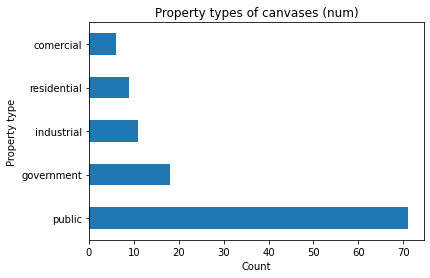

In [33]:
# create a graph showing the distribution of property types by number
ptgraph = ptsel_num.plot(kind='barh', title='Property types of canvases (num)')
ptgraph.set_xlabel('Count')
ptgraph.set_ylabel('Property type')

Text(0, 0.5, 'Property type')

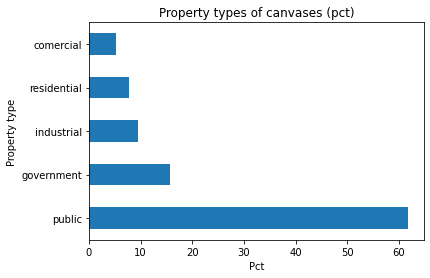

In [34]:
# create a graph showing the distribution of canvas property types by percentage
ptgraph = ptsel_pct.plot(kind='barh', title='Property types of canvases (pct)')
ptgraph.set_xlabel('Pct')
ptgraph.set_ylabel('Property type')

#### Canvas location

> Most graffiti are done in streets, while least are done in alleys.
> Moreover, the number of graffiti found on railroad tracks and overpass is the same. ~ 1/5 is other.

Text(0, 0.5, 'Canvas location')

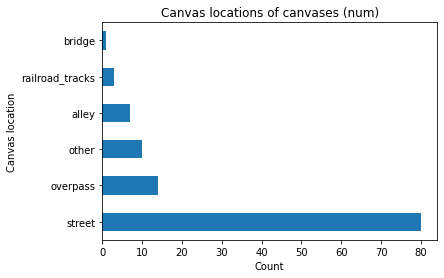

In [35]:
# create a graph showing the distribution of canvas location by number
clgraph = clsel_num.plot(kind='barh', title='Canvas locations of canvases (num)')
clgraph.set_xlabel('Count')
clgraph.set_ylabel('Canvas location')

Text(0, 0.5, 'Canvas location')

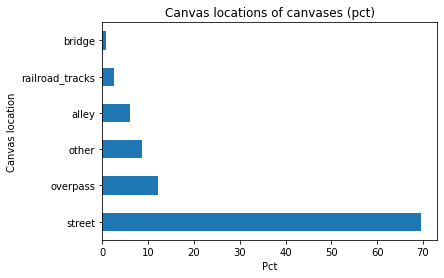

In [36]:
# create a graph showing the distribution of canvas location by number
clgraph = clsel_pct.plot(kind='barh', title='Canvas locations of canvases (pct)')
clgraph.set_xlabel('Pct')
clgraph.set_ylabel('Canvas location')

### Exploring graffito database
This section will display plots of the selected columns of `zggraffito` and `clean_graffito` dataframe from above.
The data includes the distribution by number and percentage of `type, message` of graffito db.

Graffiti type refers the artistic form of a graffito. `Type` column has tags, throwUps, stickers, pieces, etc. variables. In which, small tags are the most common type of graffiti and graffiti artists are more prone to leaving their names.

#### Type

> Most graffito are tags, with only 2 wildstyle out of 107 entries.

> tags > throwUp > stickers > piece > other > wildstyle

Text(0, 0.5, 'Graffiti type')

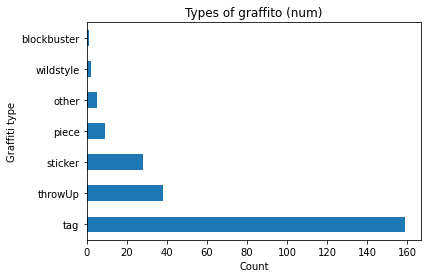

In [37]:
# create a graph showing the distribution of graffito types by number
gtgraph = gtsel_num.plot(kind='barh', title='Types of graffito (num)')
gtgraph.set_xlabel('Count')
gtgraph.set_ylabel('Graffiti type')

Text(0, 0.5, 'Graffiti type')

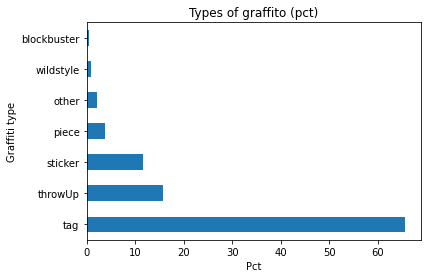

In [38]:
# create a graph showing the distribution of graffito types by percentage
gtgraph = gtsel_pct.plot(kind='barh', title='Types of graffito (pct)')
gtgraph.set_xlabel('Pct')
gtgraph.set_ylabel('Graffiti type')

#### Message

> Most graffito are writer's signature, with only few political.

> writter > other > social > political

Text(0, 0.5, 'Message type')

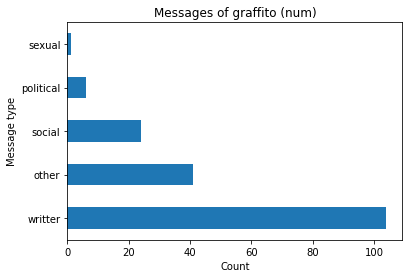

In [39]:
# create a graph showing the distribution of graffito messages by number
gmgraph = gmsel_num.plot(kind='barh', title='Messages of graffito (num)')
gmgraph.set_xlabel('Count')
gmgraph.set_ylabel('Message type')

Text(0, 0.5, 'Message type')

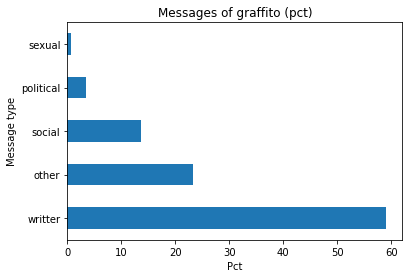

In [40]:
# create a graph showing the distribution of canvas location by number
gmgraph = gmsel_pct.plot(kind='barh', title='Messages of graffito (pct)')
gmgraph.set_xlabel('Pct')
gmgraph.set_ylabel('Message type')

## Changes/correction (1):
I created dataframes for the table displays instead of printing out the value_count results. I also added x and y labels to all the graphs. Finally, I elaborate my summaries and included the steps of which to derive the conclusions (relationship between varaibles).  

# Milestone 2

### Objective:
Summarize our graffiti information with a series of charts and tables.
1. Produce summaries for `Viewing Potential` and `Accessibility`
2. Produce summaries for `Canvas Location x Accessibility` and `Viewing Potential x Accessibility`
3. Produce summaries for `Technique` and `Transcribable`
4. Produce summaries for `Type x Number of Colors` and `Message x Number of Colors`
5. Produce summaries for `Canvas Locations (c) x Message(g)` and `Property Type (c) x Message(g)`

**I combine both my and Eowyn's work in this milestone; however, I modified her code to my knowledge and quoted her interpretations.
I also clean my data separately in every summary because I find it more eligible and easier to understand.**

## Summaries: 

### Summary 1

#### Accessibility (Annie)

For the graffiti that are accessible on multiple levels, I count them as separate individuals. For instance, graffito found at `street-level and thru_vegetation` is **not the same** from only `street_level`.

##### Cleaning (accessibility)

In [41]:
# check if the `accessibility` column have null values
zgcanvas.accessibility.isnull().sum()

0

##### Data table 1 - create a new DataFrame that stores unique accessibility count

In [42]:
# find all the unique canvas accessibilities and count them
unique, counts = np.unique(zgcanvas.accessibility, return_counts=True)
df = pd.DataFrame(zip(unique, counts), columns = ['Accessibility', 'Count']).sort_values('Count')
df

,Accessibility,Count
0,"['climbing', 'tall_barrier']",1
1,['climbing'],1
2,"['heavenly_spot', 'tall_barrier']",1
3,"['short_barrier', 'street_Level', 'climbing']",1
6,"['street_Level', 'short_barrier']",1
7,"['street_Level', 'tall_barrier']",1
8,"['street_Level', 'thru_vegetation', 'thru_gate...",1
11,"['tall_barrier', 'climbing', 'short_barrier', ...",1
13,['thru_vegetation'],1
4,"['short_barrier', 'street_Level']",2


##### Chart 1: Unique Canvas Aceessibility Count (sorted by count)

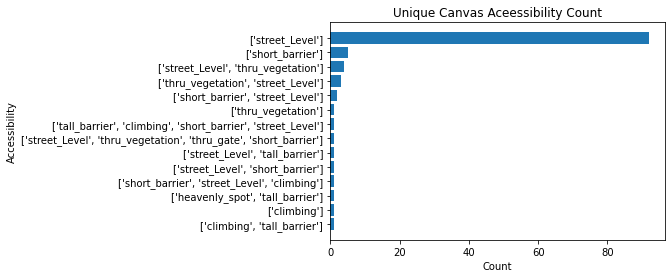

In [43]:
fig, ax = plt.subplots()

ax.barh(df.Accessibility, df.Count)
ax.set_xlabel('Count')
ax.set_ylabel('Accessibility')
ax.set_title('Unique Canvas Aceessibility Count')

plt.show()

#### Viewing Potential (Eowyn) - **modified**

Viewing potential count will be sorted into the order `high, medium, low`.

> A high viewing pottential canvas would be something easily seen- even by people not paying attention. An example of this would be a stop sign. Medium is visable but easy to miss- like on a fence bellow eye level. Low viewing potential means the average pedestrain will not see this graffiti. An example would be an alley way. - Eowyn

##### Cleaning (viewing_potential)

In [44]:
# check if the `viewing_potential` column have null values
zgcanvas.viewing_potential.isnull().sum()

0

##### Data table 1 - count the three viewing potential type and sort

In [45]:
# count viewing_potential
unique, counts = np.unique(zgcanvas.viewing_potential, return_counts=True)
df = pd.DataFrame(zip(unique, counts), columns = ['viewing_potential', 'Count'])

# sort into high, medium, low and update df
df['viewing_potential'] = pd.Categorical(df['viewing_potential'], ['high', 'medium', 'low'])
df = df.sort_values(by=['viewing_potential'])
df

,viewing_potential,Count
0,high,14
2,medium,74
1,low,27


##### Chart 1.1: Canvas Viewing Potential (sorted by potential)

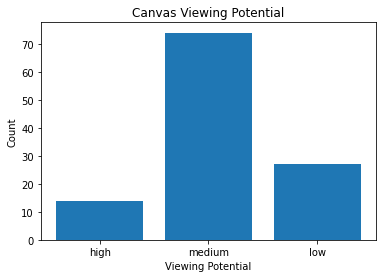

In [46]:
fig, ax = plt.subplots()

ax.bar(df.viewing_potential, df.Count)
ax.set_ylabel('Count')
ax.set_xlabel('Viewing Potential')
ax.set_title('Canvas Viewing Potential')

plt.show()

##### Chart 1.2: Canvas Viewing Potential (pie chart)

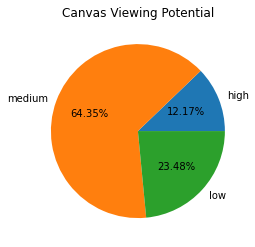

In [47]:
fig, ax = plt.subplots()

ax.pie(x=df.Count, labels=df.viewing_potential, autopct='%1.2f%%')
ax.set_title('Canvas Viewing Potential')

plt.show()

### Summary 2

#### Canvas Location x Accessibility (Annie)

#### Interpretation
With mostly street-level graffiti across various canvas area, **streets** are a big hit for the graffi writters. Our block group chose to walk along the high way overpass and discovered a wide variety of tags being painted on signs, barries/vegetation, and the ground. Since there appeared to be *many surveillance* around (fire station nearby), writters may choose to be low to the ground and paint at an accessible height of populated areas. In order to spread their name and message, they chose areas and levels that meets human sight - street-level canvas near streets.

##### Cleaning (canvas_location)

In [48]:
# check if the `canvas_location` column have null values
zgcanvas.canvas_location.isnull().sum()

0

##### Data table 2 - count canvas location and accessibility combinations, fill null to 0

In [49]:
# combine canvas accessibility and canvas_locations columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
cl_a = zgcanvas.groupby(['canvas_location', 'accessibility'])['id'].count().unstack().fillna(0)
cl_a

accessibility,"['climbing', 'tall_barrier']",['climbing'],"['heavenly_spot', 'tall_barrier']","['short_barrier', 'street_Level', 'climbing']","['short_barrier', 'street_Level']",['short_barrier'],"['street_Level', 'short_barrier']","['street_Level', 'tall_barrier']","['street_Level', 'thru_vegetation', 'thru_gate', 'short_barrier']","['street_Level', 'thru_vegetation']",['street_Level'],"['tall_barrier', 'climbing', 'short_barrier', 'street_Level']","['thru_vegetation', 'street_Level']",['thru_vegetation']
canvas_location,,,,,,,,,,,,,,
alley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0
bridge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
other,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0
overpass,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0
railroad_tracks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
street,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,3.0,67.0,1.0,2.0,0.0


##### Chart 2: Graffiti Accessibility at Different Canvas Location

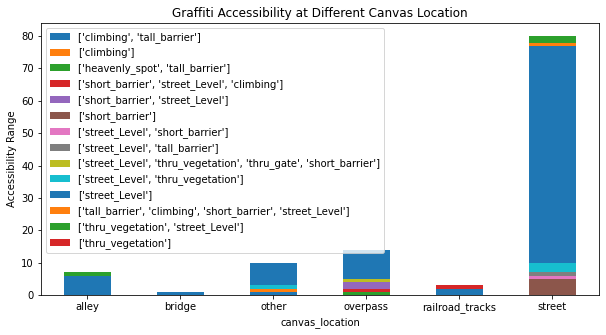

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

cl_a.plot.bar(ax=ax, stacked=True, rot=0)
ax.legend(loc='upper left')
ax.set_ylabel('Accessibility Range')
ax.set_title('Graffiti Accessibility at Different Canvas Location')

plt.show()

#### Viewing Potential x Accessibility (Eowyn) - **modified**

#### Interpretation
Most of the graffiti are done at **medium viewing potential**. It's about the height of an adult human eye-sight. People won't need extra effort to read a graffito if they are at a relatively approachable place. Therefore, it would be easier for pedestrian to catch sight of graffito. It's also easier for the writer to put them there.
>It appears that graffiti writers prefer to choose canvases with **medium viewing potential**. Our block does not appear to have many high viewing potential spots aside from the **high way** (which would be at street level)- which my partner and I have limited access to because of the safety concern. There is not much effort to in our block to create graffiti that will not be seen- as evidence by the few number of canvases that are behind barriers/vegetation or in low visibility spots. When we do see graffiti behind vegetation and barriers it is typically near other more visible graffiti. Writers are willing to have their work be covered when the canvas and surronding canvases have graffiti on them. Often tags will be left in harder to see spots- as these are done quickly they need to be done at the canvases most accessible to them: street level. - Eowyn

##### Data table 2 - count viewing potential and accessibility combinations, fill null to 0

In [51]:
# combine viewing_potential and accessibility columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
vp_a = zgcanvas.groupby(['viewing_potential', 'accessibility'])['id'].count().unstack().fillna(0)
vp_a

accessibility,"['climbing', 'tall_barrier']",['climbing'],"['heavenly_spot', 'tall_barrier']","['short_barrier', 'street_Level', 'climbing']","['short_barrier', 'street_Level']",['short_barrier'],"['street_Level', 'short_barrier']","['street_Level', 'tall_barrier']","['street_Level', 'thru_vegetation', 'thru_gate', 'short_barrier']","['street_Level', 'thru_vegetation']",['street_Level'],"['tall_barrier', 'climbing', 'short_barrier', 'street_Level']","['thru_vegetation', 'street_Level']",['thru_vegetation']
viewing_potential,,,,,,,,,,,,,,
high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0
low,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,21.0,0.0,1.0,1.0
medium,0.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,0.0,4.0,57.0,1.0,2.0,0.0


##### Chart 2: Graffiti Accessible at Different Viewing Potential

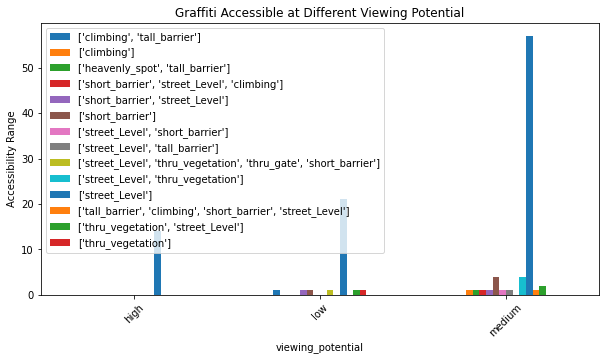

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

vp_a.plot.bar(ax=ax)
plt.xticks(rotation=45)
ax.legend(loc='upper left')
ax.set_ylabel('Accessibility Range')
ax.set_title('Graffiti Accessible at Different Viewing Potential')

plt.show()

### Summary 3

#### Transcribable (Annie)

##### Cleaning (transcribable)

In [53]:
# check if the `transcribable` column have null values
zggraffito.transcribable.isnull().sum()

0

##### Data table 3 - N's and Y's of Transcribability

In [54]:
# count all the N's and Y's of transcribable column
unique, counts = np.unique(zggraffito.transcribable, return_counts=True)
df = pd.DataFrame(zip(unique, counts), columns = ['Transcribable', 'Count'])
df

,Transcribable,Count
0,N,66
1,Y,176


##### Chart 3: Graffiti Transcribability Distribution

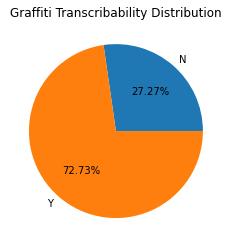

In [55]:
fig, ax = plt.subplots()

ax.pie(x=df.Count, labels=df.Transcribable, autopct='%1.2f%%')
ax.set_title('Graffiti Transcribability Distribution')

plt.show()

#### Technique (Eowyn) - **modified**

##### Cleaning (technique)

In [56]:
## check if the `technique` column have null values
zggraffito['technique'].isnull().sum()

10

In [57]:
# find entries with valid technique from the technique column
sel = zggraffito.technique.notnull()

In [58]:
# apply selection and clean message column
clean_technique = zggraffito.loc[sel, :]

In [59]:
#just checking that we end up with the right amount (108-10)
len(clean_technique)

232

##### Data table 3 - Technique counts

In [60]:
# count all the N's and Y's of transcribable column
unique, counts = np.unique(clean_technique.technique, return_counts=True)
df = pd.DataFrame(zip(unique, counts), columns = ['Technique', 'Count'])
df

,Technique,Count
0,incision,4
1,marker,78
2,other,36
3,spray,114


##### Chart 3.1: Graffiti Technique Distribution

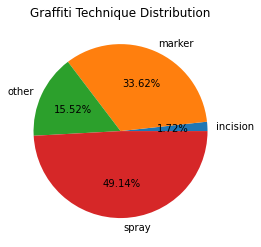

In [61]:
fig, ax = plt.subplots()

ax.pie(x=df.Count, labels=df.Technique, autopct='%1.2f%%')
ax.set_title('Graffiti Technique Distribution')

plt.show()

##### Chart 3.2: Graffiti Technique Distribution

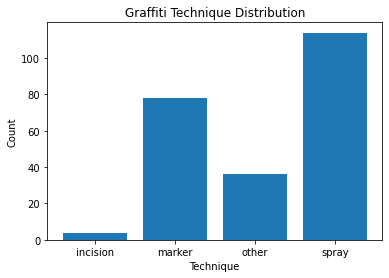

In [62]:
fig, ax = plt.subplots()

ax.bar(df.Technique, df.Count)
ax.set_ylabel('Count')
ax.set_xlabel('Technique')
ax.set_title('Graffiti Technique Distribution')

plt.show()

### Summary 4

#### Message x Number of Colors (Annie)

#### Interpretations
Graffiti writters like to make **single-color** work the most. Although there are exceptions that create pieces that are 3-5 colors, sometimes even 6, artists like to stay minimal and often use **less than 3 colos**. We found pieces with vibrant colors on the walls and fences of an abandoned yard (ruins). Therefore, I would assume that due to the surveillance problem discussed in summary 2, writters would only carry one or two cans of spray paint in their pocket to achive *quick and easy* results.

##### Cleaning (message)

In [63]:
# check if the `message` and `num_colors` columns have null values
zggraffito.message.isnull().sum(), zggraffito.num_colors.isnull().sum()

(66, 4)

In [64]:
# find entries with valid messages from the message column
sel = zggraffito.message.notnull()

In [65]:
# apply selection and clean message column
clean_message = zggraffito.loc[sel, :]

In [66]:
#just checking that we end up with the right amount (108-30)
len(clean_message)

176

##### Data table 4 - color count found from messages (cleaned)

In [67]:
# combine message and num_colors columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
m_nc = clean_message.groupby(['message', 'num_colors'])['id'].count().unstack().fillna(0)
m_nc

num_colors,1,2,3-5,6+
message,,,,
other,31.0,9.0,0.0,0.0
political,3.0,2.0,1.0,0.0
sexual,0.0,0.0,1.0,0.0
social,13.0,6.0,2.0,3.0
writter,82.0,13.0,7.0,0.0


##### Chart 4: Number of Colors Found on Different Graffiti Messages

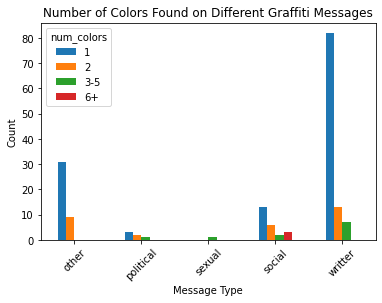

In [68]:
fig, ax = plt.subplots()

m_nc.plot.bar(ax=ax)
plt.xticks(rotation=45)
ax.set_xlabel('Message Type')
ax.set_ylabel('Count')
ax.set_title('Number of Colors Found on Different Graffiti Messages')


plt.show()

#### Type x Number of Colors (Eowyn) - **modified**

#### Interpretations
There is a huge amount of **tags** found in our block group area. Since we chose an area with schools and high way near by, there will always be more "accessible" message. Writer spend much less time on their work and end up putting up tags and stickers. They won't even have to worry about their work being taken down because the purpose of tag is meant to be `gaining "Fame"`, they can always redraw and replicate if they desire. Nonetheless, there is no need to use excessive amount of colors when it comes to tagging.
> When analyzing how graffito type (such as tag or sticker) compares to the colors used we learn some valuable information.
Tags are exclusively written in one color. This makes sense as they are something quickly written- using multiple colors would slow the writer down and leave the tag harder to read. Pieces typically have a variety of colors- we can see that they most commonly have 6+ colors. But suprisingly they can also be done with 1-2 colors. The Throw Ups in our area are usually either outlines or filled with a single color. We have no instances with more than 2 colors. This might be because a more embellished Throw Up might be labeled as a piece instead. Our block's stickers are usually 1 color for background and 1 color for text/design. We can see that 2 colors for stickers is the most common. This will make it easily readable. It looks like in our area the only types with more than 2 colors are labour intensive types (pieces and wildstyle) or premade (stickers) - Eowyn

##### Cleaning (type and num_colors)

In [69]:
# check if the `type` and `num_colors` columns have null values
zggraffito.type.isnull().sum(), zggraffito.num_colors.isnull().sum()

(0, 4)

##### Data table 4 - color count found from types

In [70]:
# combine message and num_colors columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
t_nc = zggraffito.groupby(['type', 'num_colors'])['id'].count().unstack().fillna(0)
t_nc

num_colors,1,2,3-5,6+
type,,,,
blockbuster,0.0,0.0,1.0,0.0
other,2.0,1.0,1.0,0.0
piece,4.0,1.0,2.0,2.0
sticker,3.0,19.0,5.0,1.0
tag,150.0,3.0,3.0,0.0
throwUp,19.0,17.0,2.0,0.0
wildstyle,1.0,0.0,1.0,0.0


##### Chart 4: Number of Colors Found on Different Graffito Type

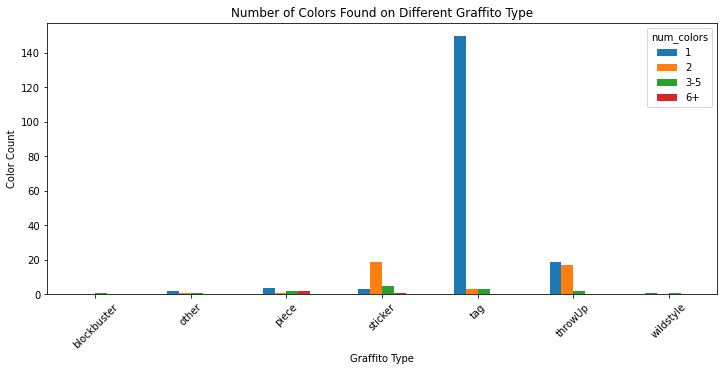

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (12,5))

t_nc.plot.bar(ax=ax)
plt.xticks(rotation=45)
ax.set_xlabel('Graffito Type')
ax.set_ylabel('Color Count')
ax.set_title('Number of Colors Found on Different Graffito Type')


plt.show()

### Summary 5

#### Canvas Locations (c) x Message(g) (Annie)

#### Interpretations
From summary 2, we already knew that more graffiti are done by the streets. However, we also employed the graffito database to discover that most of the graffiti are about publicizing the **writer's pseudonym**. There is a relatively equally distributed amount of graffito type in every canvas location we recorded: `writer >= other > social > political`. We know that surveillance play a huge role in effecting the art style from summary 2 and 4. In this section, we see **few, close to none political messages** also due to surveillance issues. We may have miss out some of the political messages when they are being removed by the vigillante.

##### Join canvas and graffito (with cleaned message columns) database

In [72]:
# knowing canvas_location does not have null values and message column being cleaned and stored in clean_message dataframe,
# do an inner join with zgcanvas and clean_message to merge the two database and eliminate furthur null values
combine = pd.merge(zgcanvas, 
                   clean_message, 
                   left_on='id',
                   right_on='canvas_id',
                   how='inner'
                  )
combine.head()

,id_x,created_at_x,uploaded_at_x,created_by_x,title_x,accuracy,lat,long,at_canvas,date_entry_canvas,...,other,num_colors,colors,nature_graffiti,transcribable,message,transcription,num_coveredby,num_covering,notes
0,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,NaN,1,['red'],['Image'],Y,social,Eyes,2.0,2.0,Can not get close too
1,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,NaN,3-5,"['black', 'white', 'yellow']",['Text'],Y,writter,"Ya [G, C][A,R] FIX",3.0,0.0,Can not get close to
2,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,NaN,1,"['blue', 'red']",['Text'],Y,writter,Nerc skorm,0.0,1.0,None
3,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,NaN,1,['pink'],['Image'],Y,other,Flower,5.0,0.0,Can not get close too
4,148,2021-12-03 15:03:32.957000-08:00,2021-12-03 15:19:51-08:00,eowyng07@uw.edu,12/03/2021 Wall,21.0,47.643313,-122.316631,Y,12/03/2021,...,NaN,2,"['black', 'white']",['Text'],Y,writter,BBLB,2.0,2.0,Can not get close to


##### Data table 5 - message type found in different canvas location

In [73]:
# combine canvas_location and message columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
cl_m = combine.groupby(['message', 'canvas_location'])['id_x'].count().unstack().fillna(0)
cl_m

canvas_location,alley,bridge,other,overpass,railroad_tracks,street
message,,,,,,
other,2.0,1.0,5.0,7.0,3.0,23.0
political,1.0,0.0,0.0,0.0,0.0,5.0
sexual,0.0,0.0,0.0,1.0,0.0,0.0
social,0.0,0.0,4.0,1.0,0.0,19.0
writter,10.0,0.0,9.0,25.0,4.0,56.0


##### Chart 5: Message Type at Different Canvas Location

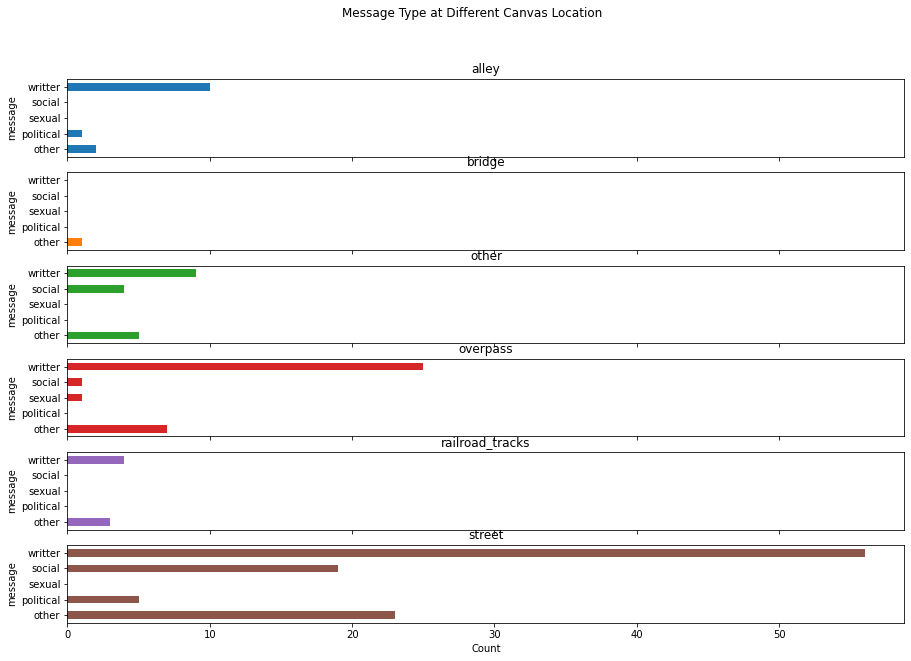

In [74]:
# plot bar chart one per canvas_location
fig ,ax = plt.subplots(6, 1,figsize=(15,10), sharex= True)

cl_m.plot.barh(ax = ax, subplots= True, legend= False)
plt.xlabel('Count')
fig.suptitle('Message Type at Different Canvas Location')

plt.show()

#### Property Type x Message (Eowyn) - **modified**

#### Interpretations
There are more graffiti found on **public properties**. Most of the messages are about the writter. However, with an exception in residental area with *more social messages*. Depending on the property type, writer would be critical about the message they are trying to convey and spread. In this case, writers are hoping to inform the resident about current crisis, more than calling out their name.
>We can gain valuable information by examine which **graffiti messages are written on each property types.** In our area we rarely see **political graffiti.** Here we can see that it has only been seen in industrial settings and public settings. We see them at too low of a number to be able to make connections to property types. It does seem like those in our block are not very politically minded. We can see that graffiti of the writer’s **name** is incredibly common. The public property types are the ones most **visible** to the passersby- this is why tags are more common here. Also the writer's name is usually left in the form of a tag which can be quickly done- graffito done on public property also needs to be quickly done. **Other** is typically images/art or unknown (for instance is Skooma a nickname or just a video game reference). We can see that Other is enormously present in public. This might be because, as I have already mentioned, many tags are indistinguishable between being nicknames or simply other. The prevalence of 'other' in public property types is because of seemingly random words being tagged and stickers (that show 'other' messages like artwork or advertisements). I believe that all of our residential canvases belong to a  few nearby canvases on an abandoned residential fence (or right next to it). Meaning our residential canvases were a highly **concentrated** space. I believe we see so many social messages because the audience is a more insular community (the neighborhood). There are very few business in the area and those business do not have graffiti on them. This is probably due to the abandoned lot on the main street being a safer location where graffiti will be left up. The commercial canvases are this abandoned building- we labeled it as commercial given its location. - Eowyn

##### Cleaning (property_type and message)

In [75]:
# check if the `property_type`, message has already been cleaned
zgcanvas.property_type.isnull().sum()

0

**canvas and graffito database** are already joined and named `combine` from my portion of summary 5

##### Data table 5 - message found from different property

In [76]:
# combine property_type and message columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
pt_m = combine.groupby(['property_type', 'message'])['id_x'].count().unstack().fillna(0)
pt_m

message,other,political,sexual,social,writter
property_type,,,,,
comercial,2.0,0.0,0.0,1.0,7.0
government,7.0,2.0,0.0,6.0,11.0
industrial,4.0,1.0,0.0,2.0,6.0
public,26.0,2.0,1.0,9.0,73.0
residential,2.0,1.0,0.0,6.0,7.0


##### Chart 5.1: Message Type on Different Property
With an expand bar chart, we can tell clearly the distinct differences between each message type in every property type.
For example, I can tell that there are a significant amount of writter graffito on public properties and other message types in the same property. 

However, I think this chart does not show a clear comparison for the property types. Therefore, I included a stack bar chart below to concentrate the data distributed on the property types. By doing this, I was able to tell graffiti left much more graffiti on public properties, which may effect the message type count in those areas. Instead, there are an similar distribution in every property by ratio.

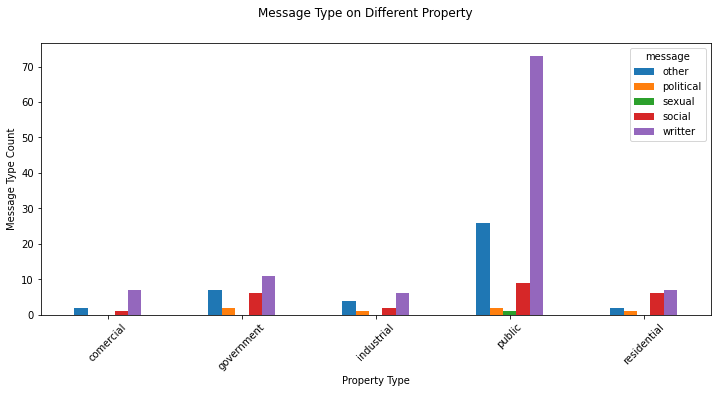

In [77]:
# plot bar chart one per canvas_location
fig ,ax = plt.subplots(1, 1, figsize = (12,5))

pt_m.plot.bar(ax = ax)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Message Type Count')
fig.suptitle('Message Type on Different Property')

plt.show()

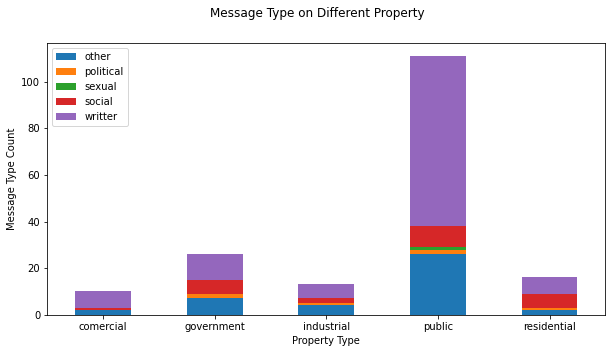

In [78]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

pt_m.plot.bar(ax=ax, stacked=True, rot=0)
ax.legend(loc='upper left')
plt.xlabel('Property Type')
plt.ylabel('Message Type Count')
fig.suptitle('Message Type on Different Property')

plt.show()

##### Chart 5.2: Message Type on Different Property (Annie)

## Changes/correction (2):
The only change I made is to explain the difference between the last two bar charts: expand vs stack. Also, I changed the number of frames from 5 to 6 because a new canvas location of *bridge* is being added to our data for the first chart of summary 5.

# Milestone 3

## Objective:
- Create seaborn-type charts
- Create distribution maps of our block group

## Explorations:

### Data cleaning 

In [79]:
# check if required fields have any null values
# width, height, type, transcribable, property_type for the first 2 charts
# accuracy and property_use for the last charts
# create a dataframe of the selected data

sel = zg_df[['width', 'height', 'type', 'transcribable', 'property_type', 'accuracy', 'property_use']].isnull().sum()
sel_df = pd.DataFrame(sel)

In [80]:
sel_df

,0
width,0
height,0
type,0
transcribable,0
property_type,0
accuracy,0
property_use,0


### 1. The Transcribility of Varying Graffito Sizes and Types in Distinct Property Type
Chart 1 displays overall types, while chart 2 displays only the tags and sticker

This chart illustrates the relationship between the transcribility of a graffito and its geographic location while comparing the graffiti type and their canvas occupancy. I want to testify that smaller graffiti like tags and stickers on government or public property would be hard to transcribe because they are illegible and there are more surveillance than other areas. However, there seem to be an equal distribution in transcribility dispite the graffiti and property type. Yet, most of graffiti are tags and throwups found in public and residental property since they are easier to produce. Graffiti artists can always duplicate their work in areas with a decent amount of surveillance when erased. But more time is required to finish bigger graffiti like master piece and blockbusters; thus, area with less surveillance is more promasing.

#### Chart 1.1 - overall graffiti type

In [81]:
# This table gives an overview of the data I will be using in the graphs
zg_df[['width', 'height', 'type', 'transcribable', 'property_type']]

,width,height,type,transcribable,property_type
0,365,213,tag,N,public
1,365,247,throwUp,N,public
2,180,180,throwUp,N,public
3,180,90,piece,Y,public
4,180,180,throwUp,N,public
...,...,...,...,...,...
237,37,11,tag,Y,residential
238,33,15,tag,Y,residential
239,18,10,tag,Y,public
240,99,25,tag,N,public


In [82]:
# combine graffiti type and property type columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
# This will provide a basic understanding for the number of combination we see in the graph below, 
# excluding the area (height x width) and trascribable factors
gt_pt = zg_df.groupby(['type', 'property_type'])['lat'].count().unstack().fillna(0)
gt_pt

property_type,comercial,government,industrial,public,residential
type,,,,,
blockbuster,0.0,0.0,0.0,1.0,0.0
other,0.0,2.0,0.0,2.0,1.0
piece,0.0,1.0,0.0,5.0,3.0
sticker,0.0,4.0,3.0,21.0,0.0
tag,12.0,33.0,10.0,92.0,12.0
throwUp,6.0,6.0,2.0,21.0,3.0
wildstyle,0.0,0.0,0.0,2.0,0.0


In [83]:
# set a style Darkgrid, Whitegrid, Dark, White, Ticks
sns.set_style('whitegrid', {'grid.linestyle': ':'})

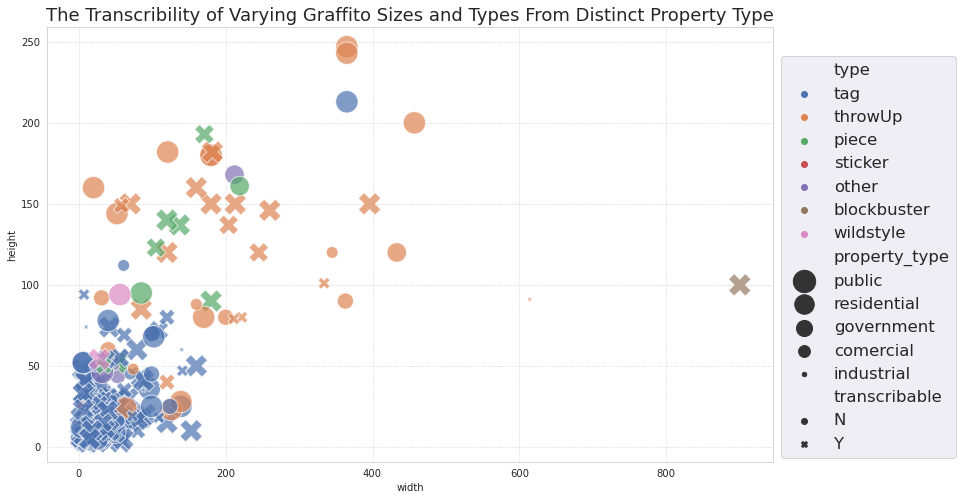

In [84]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.set(font_scale = 1.5)
sns.scatterplot(
    ax= ax, 
    data= zg_df, 
    x= 'width', 
    y= 'height', 
    hue= 'type', 
    style= 'transcribable', 
    size= 'property_type',
    sizes= (20, 500), 
    alpha= 0.7)
ax.set_title('The Transcribility of Varying Graffito Sizes and Types From Distinct Property Type')
ax.legend(bbox_to_anchor=(1, -0.01), loc='lower left')

plt.show()

#### Chart 1.2 - only tags and stickers

In [85]:
# Take only the tags and stickers from our block group
# eliminate the extreme case of area >= 30000 because that is a faliure to identify the correct graffiti type 
df2 = zg_df.loc[zg_df.type.isin(['tag', 'sticker']), :]
df2 = df2.loc[df2.height * df2.width < 30000, :]
df2[['width', 'height', 'type', 'transcribable', 'property_type']]

,width,height,type,transcribable,property_type
12,40,30,tag,N,public
13,30,9,tag,Y,public
14,7,5,sticker,Y,public
15,6,4,sticker,Y,public
16,9,4,sticker,Y,public
...,...,...,...,...,...
237,37,11,tag,Y,residential
238,33,15,tag,Y,residential
239,18,10,tag,Y,public
240,99,25,tag,N,public


In [86]:
# combine graffiti type (only stickers and tags) and property type columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
# This will provide a basic understanding for the number of combination we see in the graph below, 
# excluding the area (height x width) and trascribable factors
t_pt = df2.groupby(['type', 'property_type'])['lat'].count().unstack().fillna(0)
t_pt

property_type,comercial,government,industrial,public,residential
type,,,,,
sticker,0.0,4.0,3.0,21.0,0.0
tag,12.0,33.0,10.0,91.0,12.0


In [87]:
# combine graffiti type (only stickers and tags) and transcribable columns
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
# This will provide a basic understanding for the number of combination we see in the graph below, 
# excluding the area (height x width) and trascribable factors
t_tr = df2.groupby(['type', 'transcribable'])['lat'].count().unstack().fillna(0)
t_tr

transcribable,N,Y
type,,
sticker,2,26
tag,37,121


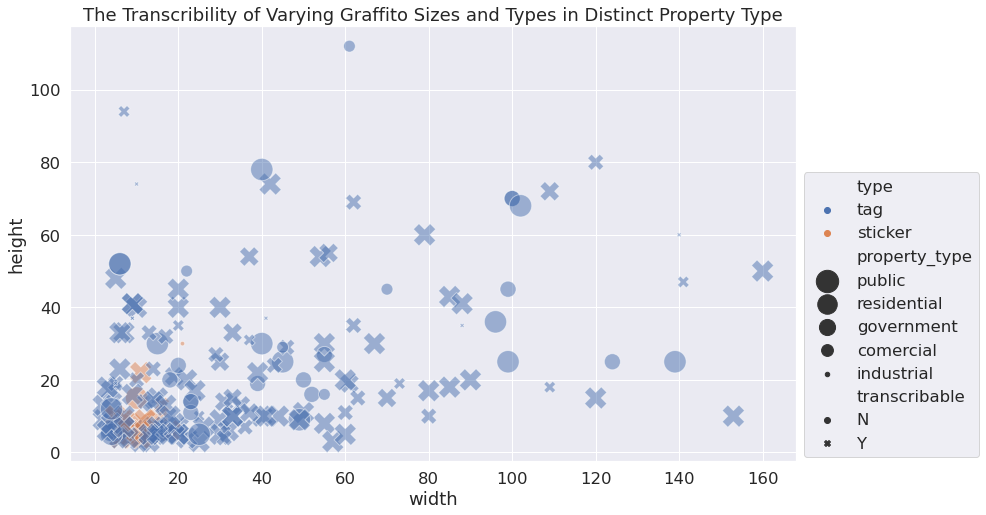

In [88]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.set(font_scale = 1.5)
sns.scatterplot(
    ax= ax, 
    data= df2, 
    x= 'width', 
    y= 'height', 
    hue= 'type', 
    style= 'transcribable', 
    size= 'property_type',
    sizes= (20, 500), 
    alpha= 0.5)
ax.set_title('The Transcribility of Varying Graffito Sizes and Types in Distinct Property Type')
ax.legend(bbox_to_anchor=(1, -0.01), loc='lower left')

plt.show()

#### Basic summary 1
The indication for `transcribable` is reverse in terms of its symbolic meanings; therefore, there are much more transcribable graffiti than non-transcribable.

To answer my statement previously made in the section, no matter the property type, there seem to be an equal distribution of the transcribability for smaller graffiti like tags and stickers. From this, I remember the idea of a tag is leave illegible marks on basically any canvases to spread their language among the artist group. It doesn't matter if we, the bypassers, understand as long as they communicate their stories to the ones that understands.

### 2. Accuracy of Different Canvas
Canvases are being categorized by their property type and use.
A new column `Accuracy Cat` (cut, use  retbins=True for threshold values) is being added to df.
- accurate: 4.0 ~ 14.0
- barely acceptable: 15.0 ~ 22.0
- inaccurate: 23.0 ~ 35.0

This chart displays the accuracy distribution in different properties. In order to understand whether if a property is in use, undetermine, or abandoned contributes to the accuracy of the canvas location. It appears that data are more likely to be accurate if being collected in property that are in use, with the most data collected from public properties, least in comercial areas. There are a few exceptions in abandoned residental and comercial areas that used to be a possible prominant building. Therefore, I believe data are more likely to be accurate if the canvas is well known in the area (not abandoned).

In [89]:
# cur the accuracy into three tiles with labels of accurate, barely acceptable, and inaccurate
zg_df['Accuracy Cat'] = pd.cut(zg_df.accuracy, bins=3, include_lowest=True, right=True, labels=['accurate', 'barely acceptable', 'inaccurate'])
zg_df[['accuracy', 'Accuracy Cat']]

,accuracy,Accuracy Cat
0,21.0,barely acceptable
1,21.0,barely acceptable
2,21.0,barely acceptable
3,21.0,barely acceptable
4,21.0,barely acceptable
...,...,...
237,4.0,accurate
238,4.0,accurate
239,6.0,accurate
240,6.0,accurate


In [90]:
# This table gives an overview of the data I will be using in the graphs
zg_df[['accuracy', 'Accuracy Cat', 'property_use', 'property_type']]

,accuracy,Accuracy Cat,property_use,property_type
0,21.0,barely acceptable,abandoned,public
1,21.0,barely acceptable,abandoned,public
2,21.0,barely acceptable,abandoned,public
3,21.0,barely acceptable,abandoned,public
4,21.0,barely acceptable,abandoned,public
...,...,...,...,...
237,4.0,accurate,undetermined,residential
238,4.0,accurate,undetermined,residential
239,6.0,accurate,in Use,public
240,6.0,accurate,in Use,public


Text(0.5, 0.98, 'Accuracy of Different Canvas')

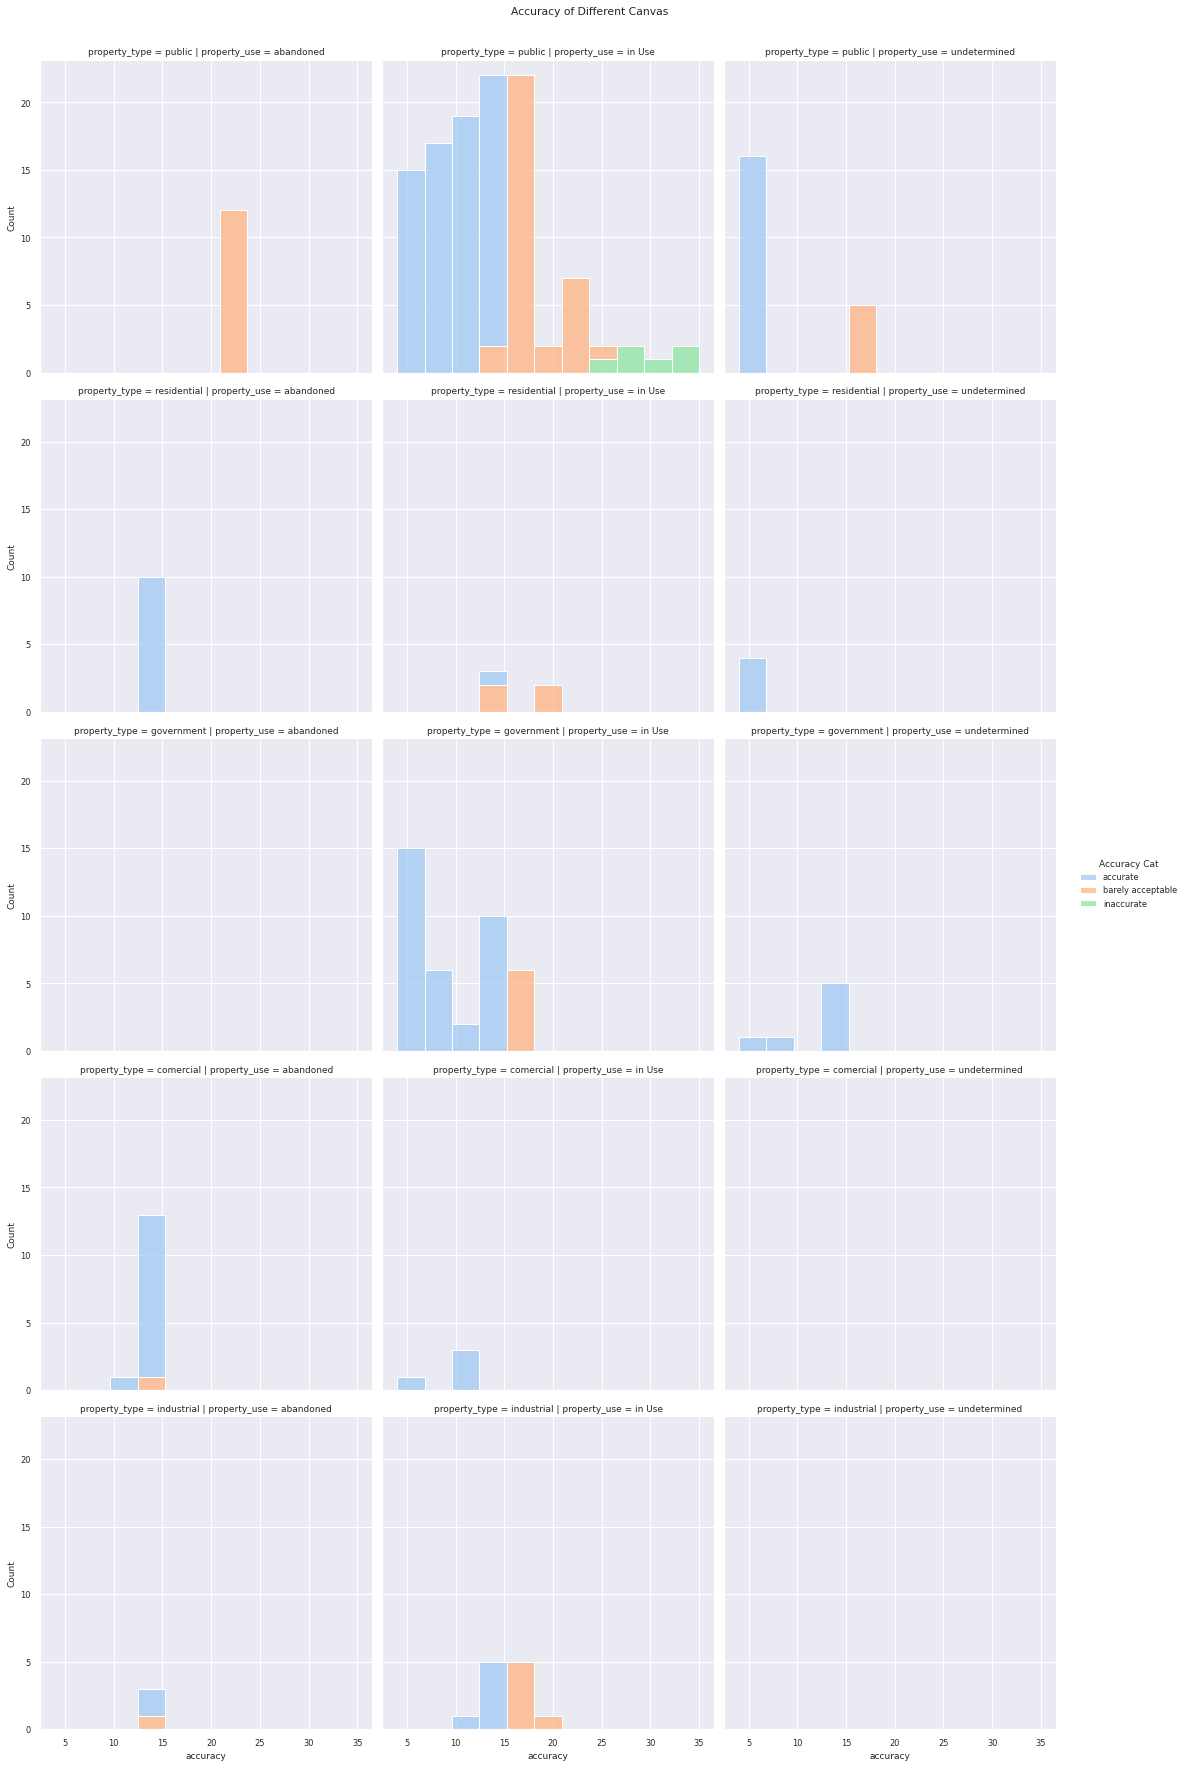

In [91]:
sns.set(font_scale = .75)
charts = sns.displot(
    data= zg_df, 
    x= 'accuracy', 
    hue= 'Accuracy Cat', 
    col= 'property_use', 
    row= 'property_type', 
    multiple= 'stack',
    palette= 'pastel')


charts.fig.subplots_adjust(top= .95)
charts.fig.suptitle('Accuracy of Different Canvas')

#### Basic summary 3
Many graffiti were found on `in use` properties. It's contraversial in that the only inaccurate data (accuracy > 23) were collected from public properties that are in use, which contradicts my claim that "popular" places will increase accuracy. Yet, there are more accurate data for the graffiti fround in places with undetermine usage and an equal amount of accurate, barely acceptable data. Therefore, the property type and property use does not play a significant role in controlling the accuracy of the data. This may occur possibly due to lower signal with satellites with places that are not well exploit.  

## Location:
A map that sums up the different graffiti types we have at our block group, with both cluster and heat display.

### Create basemap

In [92]:
# Generate a map 
fmap = folium.Map(
    location = [47.642363, -122.316606],   # coordinates of Delma Drive E
    zoom_start=15,                          # zoom level. Higher the number the closer you are
    width='30%',
    height='50%',
    min_zoom=15,
    control_scale = True
    )

### Create a dictionary to associate different colors to different graffiti types

In [93]:
# list of all colors in Folium
all_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige',
              'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink',
              'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

In [94]:
# How many distinct types of graffitido
gr_types = zg_df.type.unique()
gr_types

array(['tag', 'throwUp', 'piece', 'sticker', 'other', 'blockbuster',
       'wildstyle'], dtype=object)

In [95]:
# generate a dictionary with a color per type
type2color = {t:all_colors[i] for i,t in enumerate(gr_types)}
type2color

{'tag': 'red',
 'throwUp': 'blue',
 'piece': 'green',
 'sticker': 'purple',
 'other': 'orange',
 'blockbuster': 'darkred',
 'wildstyle': 'lightred'}

### Putting all together: layers

Make two layers: one with a `ClusterMarker`, and another with a `Heatmap`.

In [96]:
# create a all feature group
all = folium.FeatureGroup(name= 'All').add_to(fmap)

#### Graffiti markercluster

In [97]:
# create a Feature Sub Group for the graffiti markercluster
graf_sg = FeatureGroupSubGroup(all, 'Graffiti').add_to(fmap)
# Create a BLANK markercluster
marker_cluster = MarkerCluster(name= 'Graffiti').add_to(graf_sg)

In [98]:
# add markers for each graffiti to our markercluster
for indx, row in df2.iterrows():
    # create marker
    folium.Marker(location = [ row.lat, row.long ],                            # location of each graffiti
                     popup = row.type,                                         # identify the popup with each type
                      icon = folium.Icon(color = type2color[row.type], icon='pencil') # create an icon
                  ).add_to(marker_cluster)


#### Graffiti heatmap

In [99]:
# create a Feature SubGroup for the graffiti heatmap
heatmap_sg = FeatureGroupSubGroup(all, 'Heatmap').add_to(fmap)

In [100]:
HeatMap(data= zg_df.loc[:, ['lat', 'long']].values.tolist(),
       radius= 10,
       gradient= {1.0: 'red', 0.75: 'violet', 0.5: 'orange', 0.25: 'yellow'},
       overlay= False,
       show= False).add_to(heatmap_sg)

### Add layer control

In [101]:
# create a layer control
lc = folium.LayerControl().add_to(fmap)

In [102]:
# display map
fmap

## Changes/correction (3):
I added a lot more explaination and justification for why I chose to display the data as I did. I also included more tables for easier interpretation of the related graphs.

# Final

## Questions:
1. Does our block group contain more colorful graffiti compare to the entire class?
2. Is there a relationship between color and graffiti removal?

From class we read how people, or residents, are willing to keep graffito that are more asthetically pleasing. Thereby, I would like to understand how colors may impact the "survival rate" of a graffito. From my observation, pieces are less likely to be removed, which contains multiple colors. First, I will compare the ratio of colorful graffiti in our block group to the entire class.

## Explore graffiti colors

What is going on with the columns receiving more than one entry?

In [103]:
# display all the color combinations in data of the entire class
ori_df.colors.unique()

array(["['white', 'black']", "['white']", "['violet']",
       "['black', 'red']", "['black', 'blue']", "['black']",
       "['yellow', 'white', 'black']", "['yellow']", "['silver']",
       "['cyan']", "['black', 'white', 'red']", "['blue']",
       "['black', 'white']", "['blue', 'orange']",
       "['red', 'blue', 'orange']", "['gold']", "['orange']",
       "['black', 'silver']", "['black', 'yellow']", '[]',
       "['white', 'blue']", "['white', 'yellow']", "['pink']",
       "['black', 'white', 'green', 'orange']", "['black', 'pink']",
       "['white', 'red', 'green', 'blue']", "['red']",
       "['yellow', 'black']", "['yellow', 'blue']", "['green']",
       "['black', 'white', 'yellow']", "['black', 'violet']",
       "['black', 'white', 'blue']", "['white', 'black', 'blue']",
       "['blue', 'pink']", "['black', 'white', 'green']",
       "['black', 'pink', 'gold', 'white', 'green']",
       "['black', 'white', 'silver']", "['white', 'red']",
       "['red', 'green']", "['bl

In [104]:
# display all the color combinations in data of our block group
zg_df.colors.unique()

array(["['black']", "['blue', 'black']", "['red']", "['yellow']",
       "['red', 'yellow']", "['black', 'white']",
       "['black', 'white', 'yellow']", "['blue', 'red']", "['pink']",
       "['black', 'orange']", "['violet']", "['blue']",
       "['white', 'black', 'red', 'green']", "['white']",
       "['white', 'red']", "['white', 'blue', 'red']",
       "['black', 'white', 'pink', 'violet']", '[]',
       "['black', 'blue', 'red', 'green', 'yellow', 'white', 'cyan', 'violet']",
       "['green']", "['yellow', 'cyan', 'violet']", "['black', 'yellow']",
       "['green', 'yellow', 'violet']", "['white', 'yellow']",
       "['blue', 'red', 'white']", "['red', 'white']",
       "['violet', 'silver']", "['red', 'black', 'yellow']",
       "['green', 'yellow', 'blue']", "['black', 'cyan']",
       "['red', 'black']", "['white', 'blue']", "['silver']",
       "['orange']", "['black', 'white', 'red']",
       "['black', 'orange', 'green', 'white', 'pink']",
       "['black', 'white', 'bl

### Create color level variable for the entire class

We are going to use `.apply()` function which allows us to apply a function across either each row or each column. First we need to define our function

In [105]:
# define function that split string into a list of separate terms and returns number of terms
def nentries(row, col):
  '''
  Return number of entries in column
  
  Parameters
  ----------
  row: pandas series
  
  col: pandas series
      column where we have more than one entry  
  '''
    
  # get rid of literals
  lst = literal_eval(row[col])
    
  return len(lst)


In [106]:
# create clr_level variable for the entire class
# In doing so, we avoid looking at the num_color column and count the actual selected inputs 
# num_colors and colors are independent variables 
# since we can chose a number but select more, or less, than the number we selected, we want to get the actual color counts
ori_df['clr_level'] = ori_df.apply(nentries, col= 'colors', axis= 1)            

In [107]:
ori_df.head(3)

,lat,long,accuracy,property_type,property_use,surveillance,canvas_location,canvas_nature,removal,viewing_potential,...,num,type,width,height,colors,message,num_coveredby,num_covering,transcribable,clr_level
10,47.613004,-122.316147,16.0,government,in Use,"['lights', 'people']",street,sign,N,high,...,1,sticker,10,8,"['white', 'black']",writter,0.0,0.0,Y,2
11,47.613004,-122.316147,16.0,government,in Use,"['lights', 'people']",street,sign,N,high,...,1,tag,5,35,['white'],NaN,0.0,0.0,N,1
12,47.613004,-122.316147,16.0,government,in Use,"['lights', 'people']",street,sign,N,high,...,1,tag,5,30,['violet'],NaN,0.0,0.0,N,1


In [108]:
# What distinct levels?
ori_df.clr_level.unique()

array([ 2,  1,  3,  0,  4,  5,  8,  7,  6,  9, 10])

### Create color level variable for our block group

In [109]:
# create clr_level variable for our block group
# In doing so, we avoid looking at the num_color column and count the actual selected inputs 
# num_colors and colors are independent variables 
# since we can chose a number but select more, or less, than the number we selected, we want to get the actual color counts
zg_df['clr_level'] = zg_df.apply(nentries, col= 'colors', axis= 1)            

In [110]:
zg_df.head(3)

,lat,long,accuracy,property_type,property_use,surveillance,canvas_location,canvas_nature,removal,viewing_potential,...,type,width,height,colors,message,num_coveredby,num_covering,transcribable,Accuracy Cat,clr_level
0,47.643313,-122.316631,21.0,public,abandoned,[],overpass,wall,N,low,...,tag,365,213,['black'],NaN,0.0,0.0,N,barely acceptable,1
1,47.643313,-122.316631,21.0,public,abandoned,[],overpass,wall,N,low,...,throwUp,365,247,"['blue', 'black']",NaN,2.0,4.0,N,barely acceptable,2
2,47.643313,-122.316631,21.0,public,abandoned,[],overpass,wall,N,low,...,throwUp,180,180,['black'],NaN,3.0,0.0,N,barely acceptable,1


In [111]:
# What distinct levels?
zg_df.clr_level.unique()

array([1, 2, 3, 4, 0, 8, 5, 6])

### Calculate unique count for each color level
Doing this will allow us to see the numbers of different color combinations from each data.

In [112]:
# distinct color total found
zg_unique, zg_counts = np.unique(zg_df.clr_level, return_counts=True)
ori_unique, ori_counts = np.unique(ori_df.clr_level, return_counts=True)
# create dataframe using the unique counts
zg_clr_lvl = pd.DataFrame(zip(zg_unique, zg_counts), columns = ['clr_level', 'Count'])
clr_lvl = pd.DataFrame(zip(ori_unique, ori_counts), columns = ['clr_level', 'Count'])
# combine the two color level counts
combination = (pd.merge(zg_clr_lvl, clr_lvl, on='clr_level', how='outer')
    .rename(columns= {'Count_x': 'bg', 'Count_y': 'class'})
    .fillna(0))
# add a new column ratio that calculates bg / class
combination['ratio'] = combination.bg / combination['class']

combination

,clr_level,bg,class,ratio
0,0,4.0,34,0.117647
1,1,175.0,3044,0.057490
2,2,45.0,693,0.064935
3,3,10.0,214,0.046729
4,4,2.0,75,0.026667
5,5,3.0,40,0.075000
6,6,1.0,23,0.043478
7,8,2.0,6,0.333333
8,7,0.0,11,0.000000
9,9,0.0,4,0.000000


<AxesSubplot:xlabel='clr_level'>

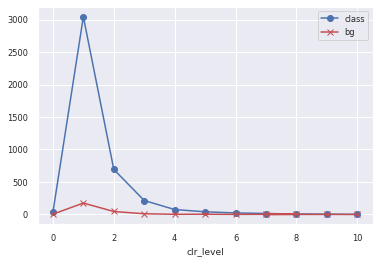

In [113]:
combination.plot(x= 'clr_level', y= {'bg', 'class'}, style= ['o-','rx-'])

### Answer to first question
We already know from the beginning combined class data has 4145 rows and our combined data has 242 rows. Although we have 1/3 of the 7-color graffiti from the entire, we have mostly monotone or simple-colored graffiti in our group (175 1-color graffiti compare to only 2 7-color graffiti). The ratio may be larger, but **it doesn't mean we have more colorful graffiti**. If we consider graffiti with colors at or over 5 as colorful, the total would be 67 and we only have 6 of them, which is only 0.09 of the total. bg line is overall lower than the class line graph. However, since not enough of vibrant data are collected, this question remain undetermine in my opinion.

From our observation, we figured that our districts has more families, more house owners, less unemployment, less people bellow the poverty line. We also have different racial demographics. Artists done easier graffiti so they don't worry about being judge and earase since they can always come back and leavel their title again. We also found more colorful graffiti next to the highway, in a heavenly spot, or under the bridge that are much more risky.

## Explore color level x graffiti removal

### Class

In [114]:
# combine clr_level and removal columns of the class
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
cl_r = ori_df.groupby(['removal', 'clr_level'])['lat'].count().unstack().fillna(0)
cl_r

clr_level,0,1,2,3,4,5,6,7,8,9,10
removal,,,,,,,,,,,
N,18.0,2458.0,527.0,165.0,61.0,35.0,22.0,10.0,4.0,4.0,1.0
Unclear,10.0,142.0,40.0,12.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Y,6.0,444.0,126.0,37.0,10.0,3.0,1.0,1.0,2.0,0.0,0.0


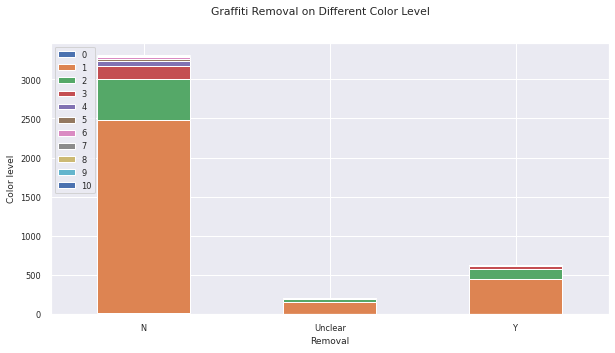

In [115]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

cl_r.plot.bar(ax=ax, stacked=True, rot=0)
ax.legend(loc='upper left')
plt.xlabel('Removal')
plt.ylabel('Color level')
fig.suptitle('Graffiti Removal on Different Color Level')

plt.show()

### Block group

In [116]:
# combine clr_level and removal columns of block group
# change null values into 0's because some rquirements does not fullfill, which turns into nulls
cl_r = zg_df.groupby(['removal', 'clr_level'])['lat'].count().unstack().fillna(0)
cl_r

clr_level,0,1,2,3,4,5,6,8
removal,,,,,,,,
N,4.0,107.0,26.0,5.0,1.0,1.0,1.0,1.0
Unclear,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Y,0.0,61.0,19.0,5.0,1.0,2.0,0.0,1.0


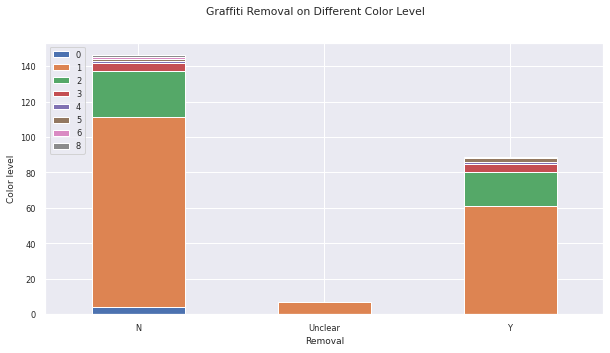

In [117]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

cl_r.plot.bar(ax=ax, stacked=True, rot=0)
ax.legend(loc='upper left')
plt.xlabel('Removal')
plt.ylabel('Color level')
fig.suptitle('Graffiti Removal on Different Color Level')

plt.show()

### Answer to second question
By eyeballing the graphs, there are significant similar comparison between the color level and amount of removal. Around 1/3 of our graffiti collected are somewhat removed. Of which, monotone graffiti contributes a great amount of the collection. The class data has less graffiti removal overall compare to our data. Yet, the ratio in each removal category remain the same. As the number of colors increase, less portion of the graffi are being equally removed or none. Therefore, color levels and graffiti removal has **very little to none relationship** (both for class and our block group).

I couldn't testify my hypothesis of people allowing asthetic graffiti roam across the district but I was able to found that beautiful pieces don't usually appear on the streets. They tend to appear in walls of abandoned allies or in places that are risky to approach.